### Module 4: Introduction to Numpy, Pandas, and Matplotlib



#### Case Study–4

#### Domain – Retail
Business challenge/requirement
BigMart is one of the biggest retailers in Europe and has operations across multiple
countries. You are a data analyst in the IT team of BigMart. Invoice and SKU-wise
Sales Data for the Year 2011 are shared with you. You need to prepare meaningful
charts to showcase the various sales trends for 2011 to top management.

Key issues
Data should be displayed pictorially to capture the attention of top management

Considerations
NONE

Data volume
- Approx 500K records – file BigMartSalesData.csv

Business benefits
This exercise is an annual exercise and BigMart makes an important investment
decisions based on trends

Approach to Solve
You have to use the fundamentals of Matplotlib covered in module 5 and plot the
following 4 charts/graph

1. Plot Total Sales Per Month for the Year 2011. How the total sales have increased over months in the Year 2011. Which month has the lowest Sales?
2. Plot Total Sales Per Month for the Year 2011 as Bar Chart. Is Bar Chart Better to visualize than a Simple Plot?
3. Plot Pie Chart for the Year 2011 Country Wise. Which Country contributes the highest towards sales?
4. Plot Scatter Plot for the invoice amounts and see the concentration of the amount. In which range most of the invoice amounts are concentrated

Enhancements for code
You can try these enhancements in code
1. Change the bar chart to show the value of the bar
2. In Pie Chart Play With Parameters shadow=True, startangle=90, and see how
different the chart looks
3. In scatter plot change the color of Scatter Points

C:\Users\tando\AppData\Local\Temp\ipykernel_28296\1148059634.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


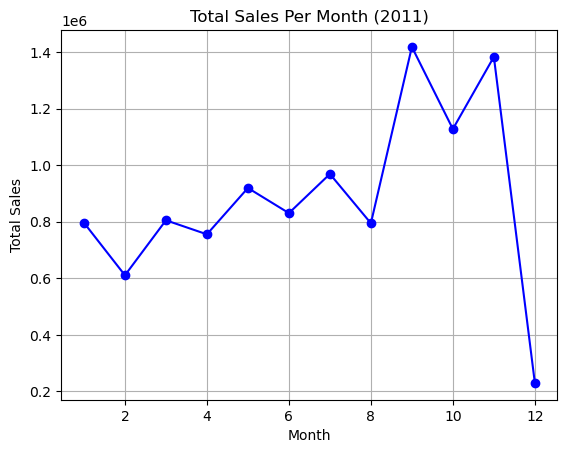

Lowest Sales Month: 12


In [6]:
# Plot Total Sales Per Month for the Year 2011. How the total sales have increased over months in the Year 2011. Which month has the lowest Sales?

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("BigMartSalesData.csv")

# Step 2: Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 3: Extract Month and Year
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Filter for 2011 data
df_2011 = df[df['Year'] == 2011]

# -------------------------------
# 1. Total Sales Per Month (Line Plot)
monthly_sales = df_2011.groupby('Month')['Amount'].sum()

plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title("Total Sales Per Month (2011)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

print("Lowest Sales Month:", monthly_sales.idxmin())

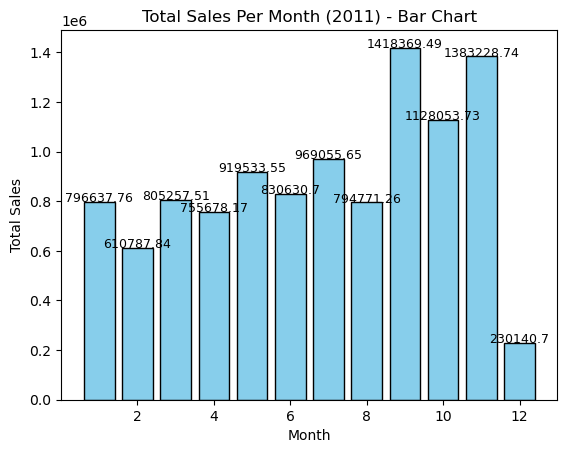

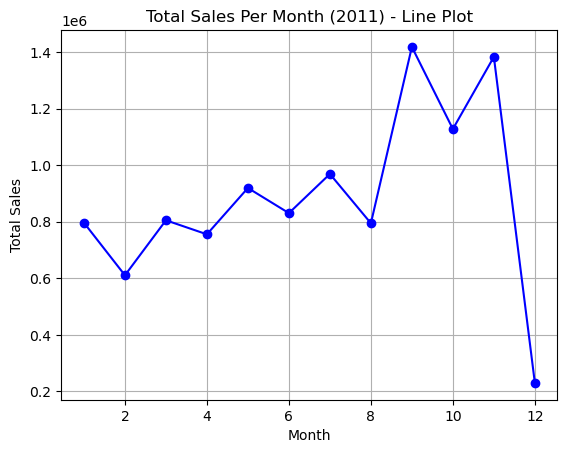

In [10]:
# Plot Total Sales Per Month for the Year 2011 as Bar Chart. Is Bar Chart Better to visualize than a Simple Plot?

# Group by Month and calculate total sales
monthly_sales = df_2011.groupby('Month')['Amount'].sum()

# --- Bar Chart ---
plt.figure()
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue', edgecolor='black')
plt.title("Total Sales Per Month (2011) - Bar Chart")
plt.xlabel("Month")
plt.ylabel("Total Sales")

# Show values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval,2), ha='center', fontsize=9)

plt.show()

# --- Simple Line Plot for comparison ---
plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.title("Total Sales Per Month (2011) - Line Plot")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


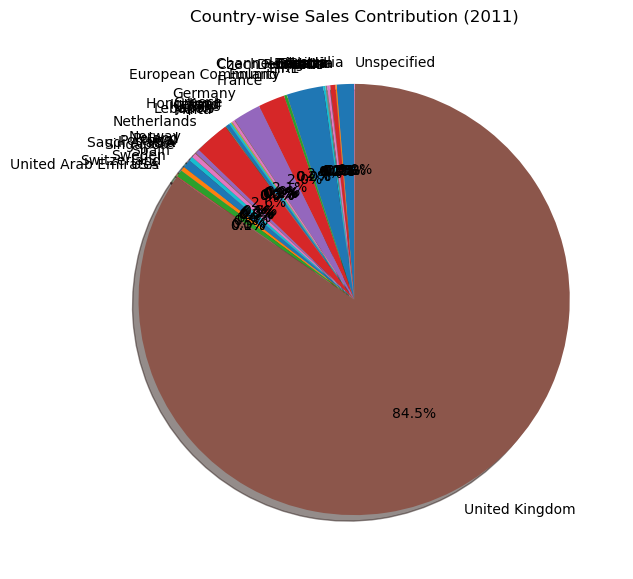

Highest Sales Country: United Kingdom


In [27]:
# Plot Pie Chart for the Year 2011 Country Wise. Which Country contributes the highest towards sales?

# Group by Country and calculate total sales
country_sales = df_2011.groupby('Country')['Amount'].sum()

# --- Pie Chart ---
plt.figure(figsize=(7,7))
plt.pie(country_sales,
        labels=country_sales.index,
        autopct='%1.1f%%',   # show percentage
        shadow=True,
        startangle=90)       # rotate start angle for better layout
plt.title("Country-wise Sales Contribution (2011)")
plt.show()

# Print the country with highest sales
print("Highest Sales Country:", country_sales.idxmax())


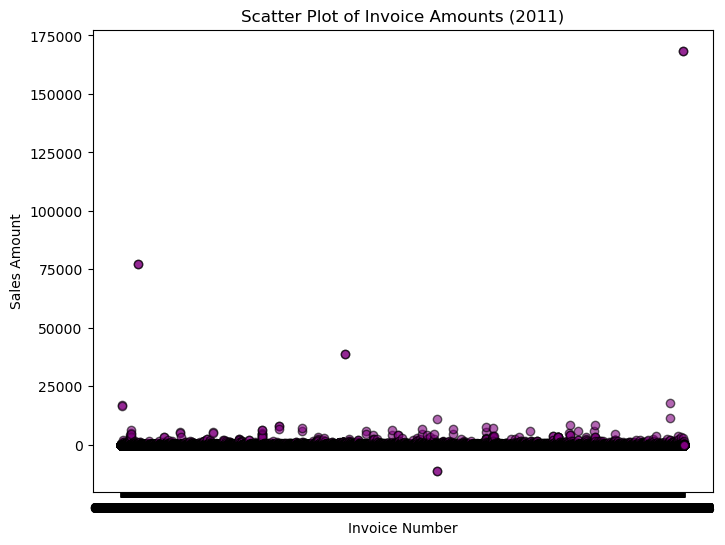

count    499395.000000
mean         21.310075
std         391.823608
min      -11062.060000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Amount, dtype: float64


In [25]:
# Plot Scatter Plot for the invoice amounts and see the concentration of the amount. In which range most of the invoice amounts are concentrated

# --- Scatter Plot of Invoice Amounts ---
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(df_2011['InvoiceNo'], df_2011['Amount'],
            color='purple', alpha=0.6, edgecolor='black')

plt.title("Scatter Plot of Invoice Amounts (2011)")
plt.xlabel("Invoice Number")
plt.ylabel("Sales Amount")
plt.show()

# --- Concentration Analysis ---
print(df_2011['Amount'].describe())
